# Exploratory Data Analysis (EDA)

Conduct EDA on real estate data to analyze relationships between variables

In [1]:
# Import Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\bronc\Downloads\Capstone 2\Real_Estate_Sales_2001-2018(clean).csv')

In [3]:
df.head()

,Unnamed: 0,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType
0,0,110540,2011,2012-04-03,Stamford,56 CHERRY HILL ROAD,795870,690000,0.866976,Residential,Single Family
1,1,120025,2012,2012-10-05,Greenwich,"78 BALDWIN FARMS SOUTH, GREENW",1925560,3224000,1.674318,Residential,Single Family
2,3,60173,2006,2006-12-28,Windsor,7 ALFORD DR,189630,309000,1.629489,Residential,Single Family
3,5,14539,2014,2015-05-28,Milford,170 MEADOWSIDE RD,147340,150000,1.018053,Residential,Single Family
4,9,160629,2016,2017-01-31,Bridgeport,75 EDGEMOOR RD,163380,180000,1.101726,Residential,Single Family


In [4]:
#Let's review the data to see if there's anything else to clean up before EDA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580245 entries, 0 to 580244
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       580245 non-null  int64  
 1   SerialNumber     580245 non-null  int64  
 2   ListYear         580245 non-null  int64  
 3   DateRecorded     580245 non-null  object 
 4   Town             580245 non-null  object 
 5   Address          580245 non-null  object 
 6   AssessedValue    580245 non-null  int64  
 7   SaleAmount       580245 non-null  int64  
 8   SalesRatio       580245 non-null  float64
 9   PropertyType     580245 non-null  object 
 10  ResidentialType  580245 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 48.7+ MB


In [5]:
df.PropertyType.value_counts()

Residential    580130
Vacant Land        64
Commercial         36
Industrial          8
Apartments          7
Name: PropertyType, dtype: int64

In [6]:
df.ResidentialType.value_counts()

Single Family    529249
Two Family        33170
Three Family      16849
Four Family         908
Multi Family         69
Name: ResidentialType, dtype: int64

In [7]:
# After inspecting these variables I decided to remove the non-residential property types as I want to focus on the others for analysis

df = df[df['PropertyType'] == 'Residential']

In [8]:
# Verify that all variables now have 580,130 rows

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580130 entries, 0 to 580244
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       580130 non-null  int64  
 1   SerialNumber     580130 non-null  int64  
 2   ListYear         580130 non-null  int64  
 3   DateRecorded     580130 non-null  object 
 4   Town             580130 non-null  object 
 5   Address          580130 non-null  object 
 6   AssessedValue    580130 non-null  int64  
 7   SaleAmount       580130 non-null  int64  
 8   SalesRatio       580130 non-null  float64
 9   PropertyType     580130 non-null  object 
 10  ResidentialType  580130 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 53.1+ MB


In [9]:
df.describe()

,Unnamed: 0,SerialNumber,ListYear,AssessedValue,SaleAmount,SalesRatio
count,580130.000000,5.801300e+05,580130.000000,5.801300e+05,5.801300e+05,5.801300e+05
mean,486418.292574,1.162658e+05,2007.900236,2.190469e+05,3.521517e+05,inf
std,262262.985355,5.502732e+05,5.043963,4.210077e+05,1.362463e+06,NaN
min,0.000000,8.200000e+01,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,301507.500000,2.088000e+04,2003.000000,9.436000e+04,1.500000e+05,1.266148e+00
50%,504531.500000,5.146250e+04,2007.000000,1.421300e+05,2.320000e+05,1.597131e+00
75%,708487.750000,1.204190e+05,2013.000000,2.240900e+05,3.660000e+05,2.050398e+00
max,912300.000000,1.600397e+07,2016.000000,1.106702e+08,9.409400e+08,inf


In [10]:
df.AssessedValue.value_counts()

0          2919
84000       259
105000      252
91000       229
112000      228
           ... 
363770        1
11050         1
31520         1
683270        1
1530280       1
Name: AssessedValue, Length: 68109, dtype: int64

In [11]:
df.SaleAmount.value_counts()

150000    5576
250000    5035
175000    4709
225000    4652
180000    4611
          ... 
282178       1
484903       1
398857       1
579025       1
59363        1
Name: SaleAmount, Length: 33907, dtype: int64

In [12]:
df = df[df['AssessedValue'] > 0]

In [13]:
df = df[df['SaleAmount'] > 0]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576065 entries, 0 to 580244
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       576065 non-null  int64  
 1   SerialNumber     576065 non-null  int64  
 2   ListYear         576065 non-null  int64  
 3   DateRecorded     576065 non-null  object 
 4   Town             576065 non-null  object 
 5   Address          576065 non-null  object 
 6   AssessedValue    576065 non-null  int64  
 7   SaleAmount       576065 non-null  int64  
 8   SalesRatio       576065 non-null  float64
 9   PropertyType     576065 non-null  object 
 10  ResidentialType  576065 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 52.7+ MB


The maximum values for AssessedValue and SaleAmount is quite high at over 100 million dollars. Since we're trying to get a grasp on residential error let's see what happens to our data with a max of less than 5 million

In [15]:
df = df[df['AssessedValue'] < 5000000]

In [16]:
df = df[df['SaleAmount'] < 5000000]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574715 entries, 0 to 580244
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       574715 non-null  int64  
 1   SerialNumber     574715 non-null  int64  
 2   ListYear         574715 non-null  int64  
 3   DateRecorded     574715 non-null  object 
 4   Town             574715 non-null  object 
 5   Address          574715 non-null  object 
 6   AssessedValue    574715 non-null  int64  
 7   SaleAmount       574715 non-null  int64  
 8   SalesRatio       574715 non-null  float64
 9   PropertyType     574715 non-null  object 
 10  ResidentialType  574715 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 52.6+ MB


This restriction only lost us 1350 rows of data which with our size is less than 1% and should provide more meaningful analysis. Next we'll verify that this worked.

In [18]:
df.describe()

,Unnamed: 0,SerialNumber,ListYear,AssessedValue,SaleAmount,SalesRatio
count,574715.000000,5.747150e+05,574715.000000,5.747150e+05,5.747150e+05,5.747150e+05
mean,487150.980627,1.168182e+05,2007.921766,2.097660e+05,3.356076e+05,2.674725e+00
std,262789.800900,5.527755e+05,5.044352,2.578989e+05,3.986677e+05,2.323596e+02
min,0.000000,8.200000e+01,2001.000000,1.000000e+00,1.000000e+00,8.153814e-07
25%,301406.000000,2.088900e+04,2003.000000,9.505000e+04,1.501000e+05,1.266434e+00
50%,506928.000000,5.174900e+04,2007.000000,1.425900e+05,2.325000e+05,1.594454e+00
75%,709670.500000,1.204710e+05,2013.000000,2.240700e+05,3.650000e+05,2.041974e+00
max,912300.000000,1.600397e+07,2016.000000,4.948370e+06,4.998000e+06,1.416667e+05


Next let's make a new column for the month to see if there's a particular month where home values are higher or lower than average

In [19]:
df['Month'] = pd.DatetimeIndex(df['DateRecorded']).month
df.head()

,Unnamed: 0,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,Month
0,0,110540,2011,2012-04-03,Stamford,56 CHERRY HILL ROAD,795870,690000,0.866976,Residential,Single Family,4
1,1,120025,2012,2012-10-05,Greenwich,"78 BALDWIN FARMS SOUTH, GREENW",1925560,3224000,1.674318,Residential,Single Family,10
2,3,60173,2006,2006-12-28,Windsor,7 ALFORD DR,189630,309000,1.629489,Residential,Single Family,12
3,5,14539,2014,2015-05-28,Milford,170 MEADOWSIDE RD,147340,150000,1.018053,Residential,Single Family,5
4,9,160629,2016,2017-01-31,Bridgeport,75 EDGEMOOR RD,163380,180000,1.101726,Residential,Single Family,1


# Data Distributions and Correlations

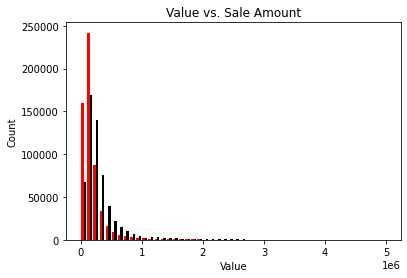

In [20]:
#Let's look at some histograms of the key variables of interest
Value = df['AssessedValue']
Sale = df['SaleAmount']
plt.hist([Value, Sale], color = ['red', 'black'], bins = 50)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Value vs. Sale Amount')
plt.show()

The histogram shows us that our data is left skewed as we would expect with house prices

Text(0, 0.5, 'Avg. Sale Price')

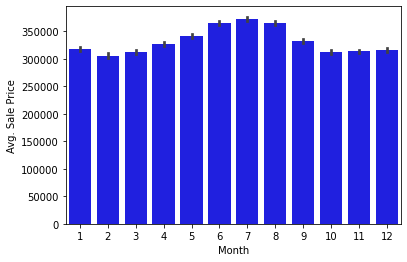

In [21]:
# Let's look at SaleAmount grouped by Month
sns.barplot(data=df, x='Month', y='SaleAmount', color='blue')
plt.xlabel('Month')
plt.ylabel('Avg. Sale Price')

Here we see that the house value for sales in each month average at least 300k while in the summer months of June through August the values peak around 350k. This is worth noting for later as we can see that the middle of the year is better for home values

<AxesSubplot:>

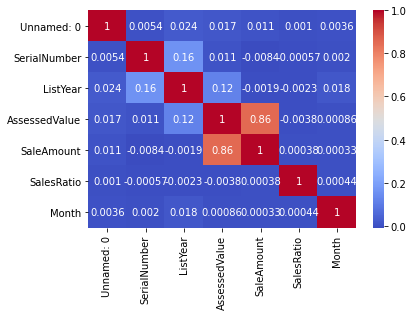

In [22]:
# Next let's look at a heatmap to see potential correlations

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

There look like there's only 1 combination that has strong correlation. AssessedValue and SaleAmount with a Pearson Correlation Coefficient of 0.86. Attempting to run a pairplot didn't seem to work. My best guess is that the data file is too large. Next let's inspect the correlation between these two variables

# Visualizing Correlations

<AxesSubplot:xlabel='AssessedValue', ylabel='SaleAmount'>

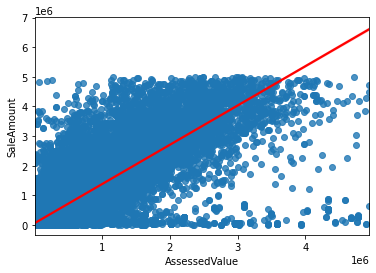

In [23]:
#Let's view the relationship between AssessedValue and SaleAmount
sns.regplot(x='AssessedValue', y='SaleAmount', data=df, scatter = True, line_kws={"color": "red"})

# Correlation Assessment

These 2 variables are highly correlated and the line definitely shows that. While the data is quite bunched together, our line of best fit is almost perfectly diagonal as our Pearson Correlation Coefficiant of 0.86 would suggest. We'll dive into this in more depth when we try to model the data.